In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
from PIL import Image

In [176]:
# Define the folder path containing the images
folder_path = "/content/drive/MyDrive/Assignment/charts/train_val/"

# Initialize an empty array to store the image data
image_data = []

# Loop over all the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(folder_path, filename))
        # Convert the image to a numpy array
        img = img.convert("RGB")
        img_array = np.array(img)
        # Append the array to the list of image data
        image_data.append(img_array)

# Convert the list of arrays to a single numpy array
X_train = np.stack(image_data)


In [177]:
folder_path = "/content/drive/MyDrive/Assignment/charts/test/"

# Initialize an empty array to store the image data
image_data = []

# Loop over all the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load the image
        img = Image.open(os.path.join(folder_path, filename))
        # Convert the image to a numpy array
        img = img.convert("RGB")
        img_array = np.array(img)
        # Append the array to the list of image data
        image_data.append(img_array)

# Convert the list of arrays to a single numpy array
X_test = np.stack(image_data)


In [178]:
X_test.shape

(50, 128, 128, 3)

In [179]:
X_train.shape

(1000, 128, 128, 3)

In [180]:
import pandas as pd
import numpy as np

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Assignment/charts/train_val.csv')
df.sample()

,image_index,type
281,281,hbar_categorical


In [181]:
df.sample(5)

,image_index,type
902,902,dot_line
13,13,vbar_categorical
287,287,hbar_categorical
402,402,line
472,472,line


In [182]:
# Get the unique values in the second column and create a dictionary to map names to numbers
names = df['type'].unique()
name_map = {name: i for i, name in enumerate(names)}
name_map 


{'vbar_categorical': 0,
 'hbar_categorical': 1,
 'line': 2,
 'pie': 3,
 'dot_line': 4}

In [183]:
# Replace the names with numbers in the second column of the dataframe
df['type'] = df['type'].map(name_map)
# Convert the second column to a numpy array
y_train = np.array(df['type'])

In [184]:
y_train.shape

(1000,)

In [185]:
y_train[:5]

array([0, 0, 0, 0, 0])

In [186]:
classes = ["vbar_categorical","hbar_categorcal","line","pie","dot_line"]

In [187]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

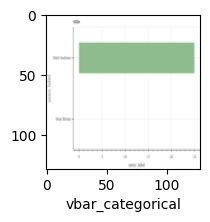

In [189]:
plot_sample(X_train, y_train, 138)


Normalizing the training data

In [190]:
X_train = X_train / 255.0
X_test = X_test / 255.0

convolutional neural network to train our images

In [191]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [192]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [193]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 30s 899ms/step - loss: 1.8002 - accuracy: 0.3550
Epoch 2/10
32/32 [==============================] - 29s 925ms/step - loss: 1.1826 - accuracy: 0.5240
Epoch 3/10
32/32 [==============================] - 29s 905ms/step - loss: 0.9889 - accuracy: 0.6210
Epoch 4/10
32/32 [==============================] - 30s 950ms/step - loss: 0.8420 - accuracy: 0.6630
Epoch 5/10
32/32 [==============================] - 29s 900ms/step - loss: 0.7484 - accuracy: 0.7320
Epoch 6/10
32/32 [==============================] - 29s 898ms/step - loss: 0.5958 - accuracy: 0.7910
Epoch 7/10
32/32 [==============================] - 28s 869ms/step - loss: 0.4598 - accuracy: 0.8420
Epoch 8/10
32/32 [==============================] - 28s 844ms/step - loss: 0.3434 - accuracy: 0.8870
Epoch 9/10
32/32 [==============================] - 29s 887ms/step - loss: 0.2462 - accuracy: 0.9100
Epoch 10/10
32/32 [==============================] - 29s 900ms/step - loss: 0.2041 - accura

After 10 epoch, I am able to achieve 92% accuracy.

#Below code is for manual checking purpose by using random number.

1/1 [==============================] - 0s 33ms/step
The Model predicted the chart as: line
The actual chart is: 


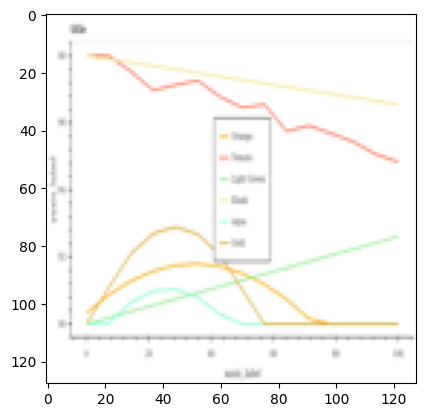

In [236]:
import random
random_int = random.randint(0, 49)

y_pred = cnn.predict(X_test[random_int].reshape((1, 128, 128, 3)))
prediction = y_pred.argmax()

mapping = {0: 'vbar_categorical',
           1: 'hbar_categorical',
           2: 'line',
           3: 'pie',
           4: 'dot_line'}
string = mapping[prediction]
print("The Model predicted the chart as: "+string)
print("The actual chart is: ")

plt.imshow(X_test[random_int])
plt.show()